#### Resources

https://code.visualstudio.com/docs/python/data-science-tutorial

https://scikit-learn.org/stable/user_guide.html

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

### Exploring the data

In [40]:
#reading data
data = pd.read_csv("train.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [41]:
test = pd.read_csv("test.csv")
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [44]:
# shape and data types of the data
print(data.shape)
print(data.dtypes)

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [45]:
print(test.shape)
print(test.dtypes)

(418, 11)
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


<AxesSubplot:>

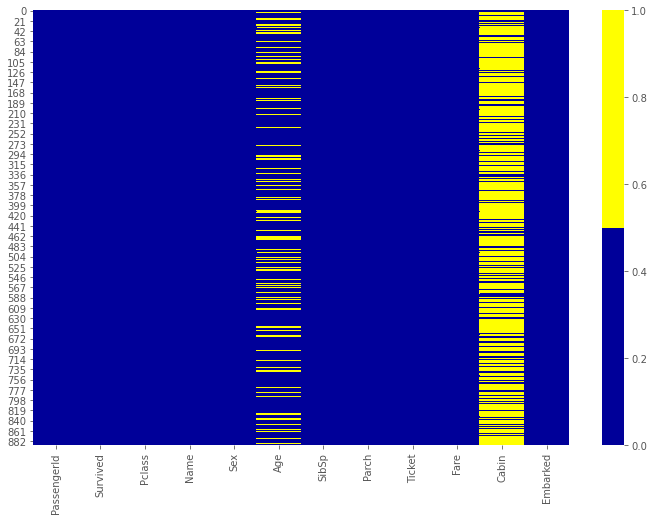

In [4]:
cols = data.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [48]:
data[["Cabin"]].dropna().values

array([['C85'],
       ['C123'],
       ['E46'],
       ['G6'],
       ['C103'],
       ['D56'],
       ['A6'],
       ['C23 C25 C27'],
       ['B78'],
       ['D33'],
       ['B30'],
       ['C52'],
       ['B28'],
       ['C83'],
       ['F33'],
       ['F G73'],
       ['C23 C25 C27'],
       ['E31'],
       ['A5'],
       ['D10 D12'],
       ['D26'],
       ['C110'],
       ['B58 B60'],
       ['E101'],
       ['D26'],
       ['F E69'],
       ['D47'],
       ['C123'],
       ['B86'],
       ['F2'],
       ['C2'],
       ['E33'],
       ['B19'],
       ['A7'],
       ['C49'],
       ['F4'],
       ['A32'],
       ['F2'],
       ['B4'],
       ['B80'],
       ['G6'],
       ['A31'],
       ['D36'],
       ['D15'],
       ['C93'],
       ['C83'],
       ['C78'],
       ['D35'],
       ['G6'],
       ['C87'],
       ['B77'],
       ['E67'],
       ['B94'],
       ['C125'],
       ['C99'],
       ['C118'],
       ['D7'],
       ['A19'],
       ['B49'],
       ['D'],
       ['C22 C26'],

### Decision 1: How do we handle the missing values?

One option that will be attempted: droping NA

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

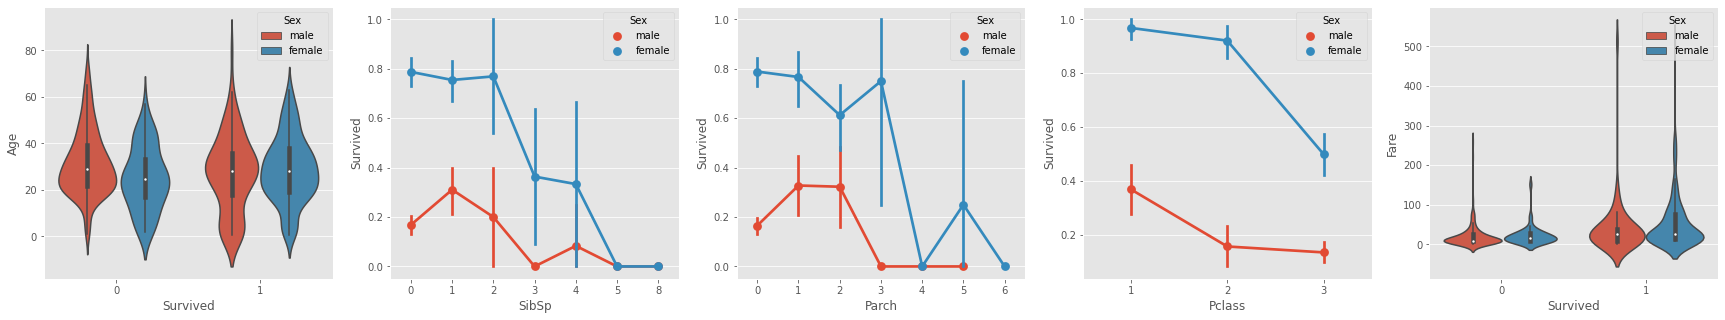

In [5]:
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="Survived", y="Age", hue="Sex", data=data, ax=axs[0])
sns.pointplot(x="SibSp", y="Survived", hue="Sex", data=data, ax=axs[1])
sns.pointplot(x="Parch", y="Survived", hue="Sex", data=data, ax=axs[2])
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data, ax=axs[3])
sns.violinplot(x="Survived", y="Fare", hue="Sex", data=data, ax=axs[4])

In [6]:
data.replace({'male': 1, 'female': 0}, inplace=True)

In [7]:
data.corr().abs()[["Survived"]]

,Survived
PassengerId,0.005007
Survived,1.000000
Pclass,0.338481
Sex,0.543351
Age,0.077221
SibSp,0.035322
Parch,0.081629
Fare,0.257307


In [8]:
data = data[['Pclass', 'Age', 'Sex','SibSp', 'Parch', 'Fare', 'Survived']].dropna()

### Splitting the data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data[['Sex','Pclass','Age','SibSp','Parch','Fare']], 
    data.Survived, test_size=0.2, random_state=0)

### Decision 2: Normalizing inputs?

"normalize the inputs such that all features are treated equally. For example, within the dataset the values for age range from ~0-100, while gender is only a 1 or 0. By normalizing all the variables, you can ensure that the ranges of values are all the same."

In [10]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(x_train)
# X_test = sc.transform(x_test)

### Decision 3: Choosing a model

### Decision 4: Choosing a model evaluation metric

### GaussianNB

In [11]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [12]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7622377622377622


### Neural network

In [26]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [28]:
model.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 6))
model.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 7         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
571/571 [==============================] - 1s 1ms/step - loss: 0.6900 - accuracy: 0.6515
Epoch 2/50
571/571 [==============================] - 0s 84us/step - loss: 0.6837 - accuracy: 0.6690
Epoch 3/50
571/571 [==============================] - 0s 90us/step - loss: 0.6731 - accuracy: 0.6725
Epoch 4/50
571/571 [==============================] - 0s 87us/step - loss: 0.6582 - accuracy: 0.6725
Epoch 5/50
571/571 [==============================] - 0s 90us/step - loss: 0.6392 - accuracy: 0.6690
Epoch 6/50
571/571 [==============================] - 0s 88us/step - loss: 0.6198 - accuracy: 0.6813
Epoch 7/50
571/571 [==============================] - 0s 86us/step - loss: 0.6069 - accuracy: 0.6830
Epoch 8/50
571/571 [==============================] - 0s 88us/step - loss: 0.6004 - accuracy: 0.6865
Epoch 9/50
571/571 [==============================] - 0s 88us/step - loss: 0.5963 - accuracy: 0.6830
Epoch 10/50
571/571 [==============================] - 0s 88us/step - loss: 0.5923 - accurac

In [31]:
y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7832167832167832


### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0).fit(X_train, y_train)
logreg.score(X_test,y_test)

0.8461538461538461

### SVM

In [37]:
from sklearn import svm
svm_clf = svm.SVC(C=1).fit(X_train,y_train)
svm_clf.score(X_test,y_test)

0.6503496503496503

### Linear SVC

In [38]:
linsvc = svm.LinearSVC(C=1).fit(X_train,y_train)
linsvc.score(X_test,y_test)

/Users/juan/opt/miniconda3/envs/myenv/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8251748251748252